In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import os.path as osp
import pandas as pd
from codex import io as codex_io
from codex import config as codex_config
from codex.ops import illumination_correction
from skimage import exposure
from skimage import io as sk_io
plt.gray()
SEED=5512
None

In [2]:
import logging
console = logging.StreamHandler()
console.setFormatter(logging.Formatter('%(asctime)s:%(levelname)s:%(name)s: %(message)s'))
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.addHandler(console)

In [3]:
# exp_name = '7-7-17-multicycle'
# exp_conf_dir = osp.join(os.environ['CODEX_ANALYSIS_REPO_DIR'], 'config', 'experiment', exp_name)
# exp_data_dir = osp.join(os.environ['CODEX_DATA_DIR'], '7-7-17-multicycle-cytokit', 'output', 'v01')
# nuc_midx = 7
# nuc_ch_name = 'ch:HOECHST1'

# exp_name = '20180706-Donor22-R2-Tcell-CODEX_CD3CD4CD85BY5'
# exp_conf_dir = osp.join(os.environ['CODEX_ANALYSIS_REPO_DIR'], 'config', 'experiment', exp_name)
# exp_data_dir = osp.join(os.environ['CODEX_DATA_DIR'], exp_name, 'output', 'v01')
# nuc_midx = 5
# nuc_ch_name = 'ch:DAPI'

# exp_name = '20180706-Donor23-R2-Tcell-CODEX_CD3CD4CD85BY5'
# exp_conf_dir = osp.join(os.environ['CODEX_ANALYSIS_REPO_DIR'], 'config', 'experiment', exp_name)
# exp_data_dir = osp.join(os.environ['CODEX_DATA_DIR'], exp_name, 'output', 'v01')
# nuc_midx = 5
# nuc_ch_name = 'ch:DAPI'

# exp_name = '20180614_D23_RepA_Tcell_CD4-CD8-DAPI_5by5'
# exp_conf_dir = osp.join(os.environ['CODEX_ANALYSIS_REPO_DIR'], 'config', 'experiment', exp_name)
# exp_data_dir = osp.join(os.environ['CODEX_DATA_DIR'], exp_name, 'output', 'v03')
# nuc_midx = 5
# nuc_ch_name = 'ch:DAPI'

# exp_name = '20180802-Donor7_Tcell-CODEX_CD3CD4CD8_7BYB7'
# exp_conf_dir = osp.join(os.environ['CODEX_ANALYSIS_REPO_DIR'], 'config', 'experiment', exp_name)
# exp_data_dir = osp.join(os.environ['CODEX_DATA_DIR'], exp_name, 'output', 'v02')
# nuc_midx = 5
# nuc_ch_name = 'ch:DAPI'

exp_name = 'RS002_CODEX_Tonsil_180426'
exp_conf_dir = osp.join(os.environ['CODEX_ANALYSIS_REPO_DIR'], 'config', 'experiment', 'wherrylab', exp_name)
exp_data_dir = osp.join(os.environ['CODEX_DATA_DIR'], 'wherrylab', exp_name, '2018_08_02_RS002_processed_cytokit', 'output', 'v01')
nuc_midx = 6
nuc_ch_name = 'ch:HOECHST2'

config = codex_config.load(exp_conf_dir)

In [4]:
config._conf['processor']['illumination_correction']

{'channel_mapping': {'HOECHST2': 'HOECHST2'},
 'filter_range': [0.01, 0.99],
 'model_params': {'max_distance': 1000, 'n_neighbors': 25, 'type': 'knn'}}

In [173]:
ic_conf = {
    #'channel_mapping': {'DAPI': 'DAPI', 'CD4': 'CD4', 'CD8': 'CD8', 'DAPI': 'DAPI'},
    'channel_mapping': {'HOECHST2': 'HOECHST2'},
    'feature_params': {
        'region': {'degree': 1, 'type': 'polynomial'},
        'tile': {'degree': 1, 'type': 'polynomial'}
    },
    'filter_params': {
        'features': ['cell_size'],
        'max_cells': 250000,
        'percentile_range': [0.01, 0.99]
    },
#     'model_params': {'type': 'ls'},
#     'model_params': {'type': 'mlp'},
#     'model_params': {'type': 'mlp', 'args': {'activation': 'relu', 'hidden_layer_sizes': (15,)}},
    'model_params': {'type': 'mlp', 'args': {'activation': 'logistic', 'hidden_layer_sizes': (50,)}},
    #'model_params': {'type': 'huber', 'args': {'alpha': .1}},
    #'model_params': {'type': 'gbr', 'args': {'n_estimators': 100}},
#     'model_params': {'type': 'ridge', 'args': {'alpha': .000001}},
    'prediction_params': {'sampling_rate': 10}
}
config._conf['processor']['illumination_correction'] = ic_conf

In [121]:
import imp
imp.reload(illumination_correction)

<module 'codex.ops.illumination_correction' from '/lab/repos/codex/python/pipeline/codex/ops/illumination_correction.py'>

In [174]:
op = illumination_correction.IlluminationCorrection(config)

In [175]:
op.prepare_region_data(exp_data_dir)

2018-08-08 11:00:27,894:DEBUG:codex.ops.illumination_correction: Building illumination model for region 0, channel "HOECHST2" using 56902 cells (58049 originally) [feature array shape = (56902, 4), response shape = (56902,)]
2018-08-08 11:00:32,405:DEBUG:codex.ops.illumination_correction: Resulting illumination image array shape = (7620, 7620) (dtype = float32)
2018-08-08 11:00:32,436:DEBUG:codex.ops.illumination_correction: Building illumination model for region 1, channel "HOECHST2" using 83603 cells (85311 originally) [feature array shape = (83603, 4), response shape = (83603,)]
2018-08-08 11:00:56,880:DEBUG:codex.ops.illumination_correction: Resulting illumination image array shape = (7620, 7620) (dtype = float32)
2018-08-08 11:00:56,912:DEBUG:codex.ops.illumination_correction: Building illumination model for region 2, channel "HOECHST2" using 68306 cells (69684 originally) [feature array shape = (68306, 4), response shape = (68306,)]
2018-08-08 11:01:01,310:DEBUG:codex.ops.illumin

In [135]:
# est = op.data[0][1]['HOECHST2']

In [136]:
# PolynomialFeatures(degree=7).fit_transform(np.array([[1,2],[3,4]])).shape

In [137]:
#est.named_steps['est'].coef_
#est.coef_

In [171]:
ch_idx = 5
#ch_idx = 4
#img_ic = op.data[0][0]['DAPI']
#img_ic = op.data[0][0]['CD8']
#img_ic = op.data[0][0]['HOECHST2']
img_ic = op.data[0][0]['HOECHST2']
img_ic.shape

(7620, 7620)

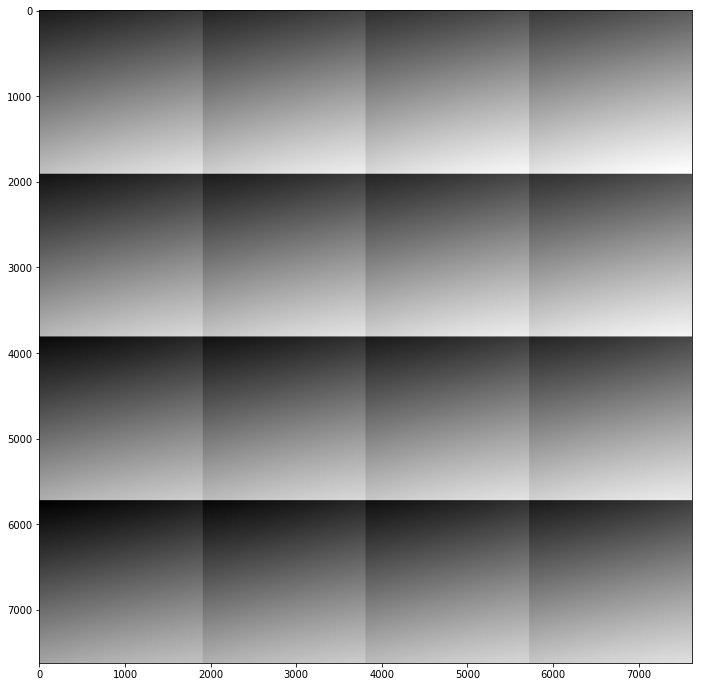

In [172]:
plt.imshow(img_ic)
plt.gcf().set_size_inches(12, 12)
#plt.colorbar()

Load original image to compare to:

In [35]:
#img_path = osp.join(exp_data_dir, codex_io.get_montage_image_path(0, 'hoechst'))
img_path = osp.join(exp_data_dir, codex_io.get_montage_image_path(0, 'best_z_segm'))
#img_path = osp.join(exp_data_dir, codex_io.get_montage_image_path(1, 'best_z_segm'))
img_path

'/lab/data/wherrylab/RS002_CODEX_Tonsil_180426/2018_08_02_RS002_processed_cytokit/output/v01/montage/best_z_segm/R001.tif'

In [176]:
img = codex_io.read_tile(img_path)
img.shape

(1, 1, 6, 7620, 7620)

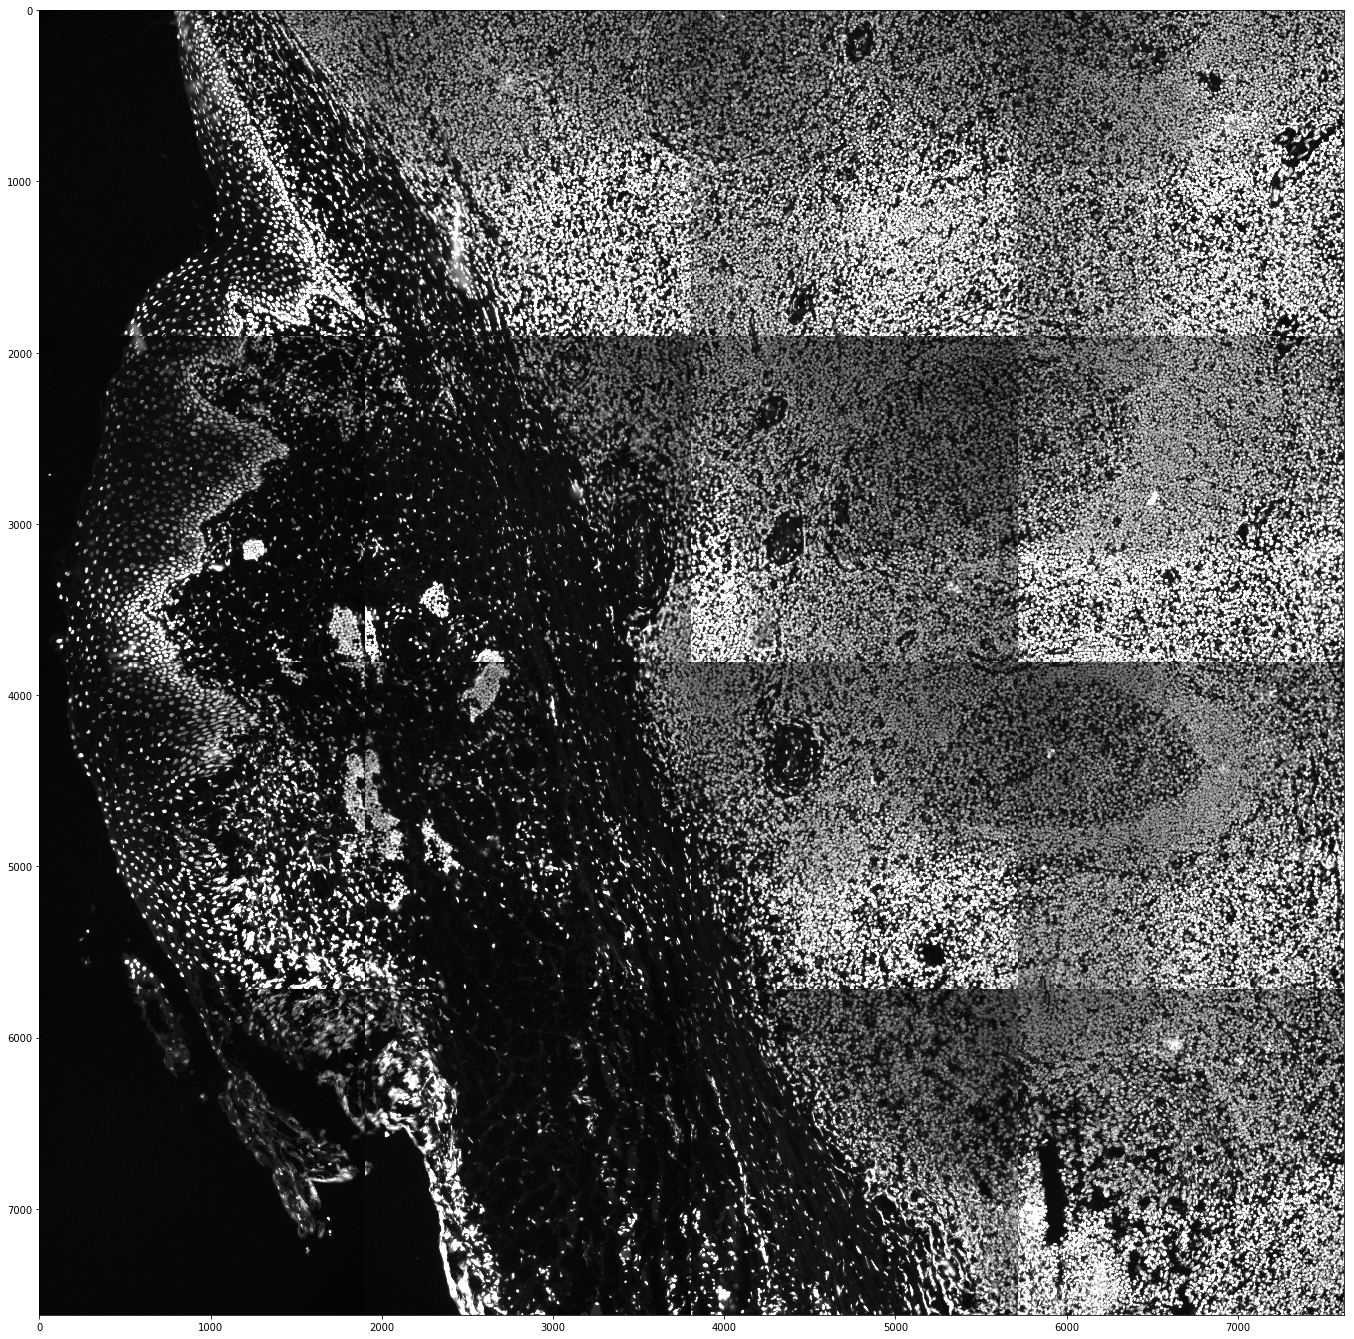

In [37]:
img_orig = img[0, 0, ch_idx]
#plt.imshow(img_orig.clip(0, 250))
plt.imshow(img_orig.clip(0, 10000))
# plt.imshow(img_orig)
plt.gcf().set_size_inches(24, 24)

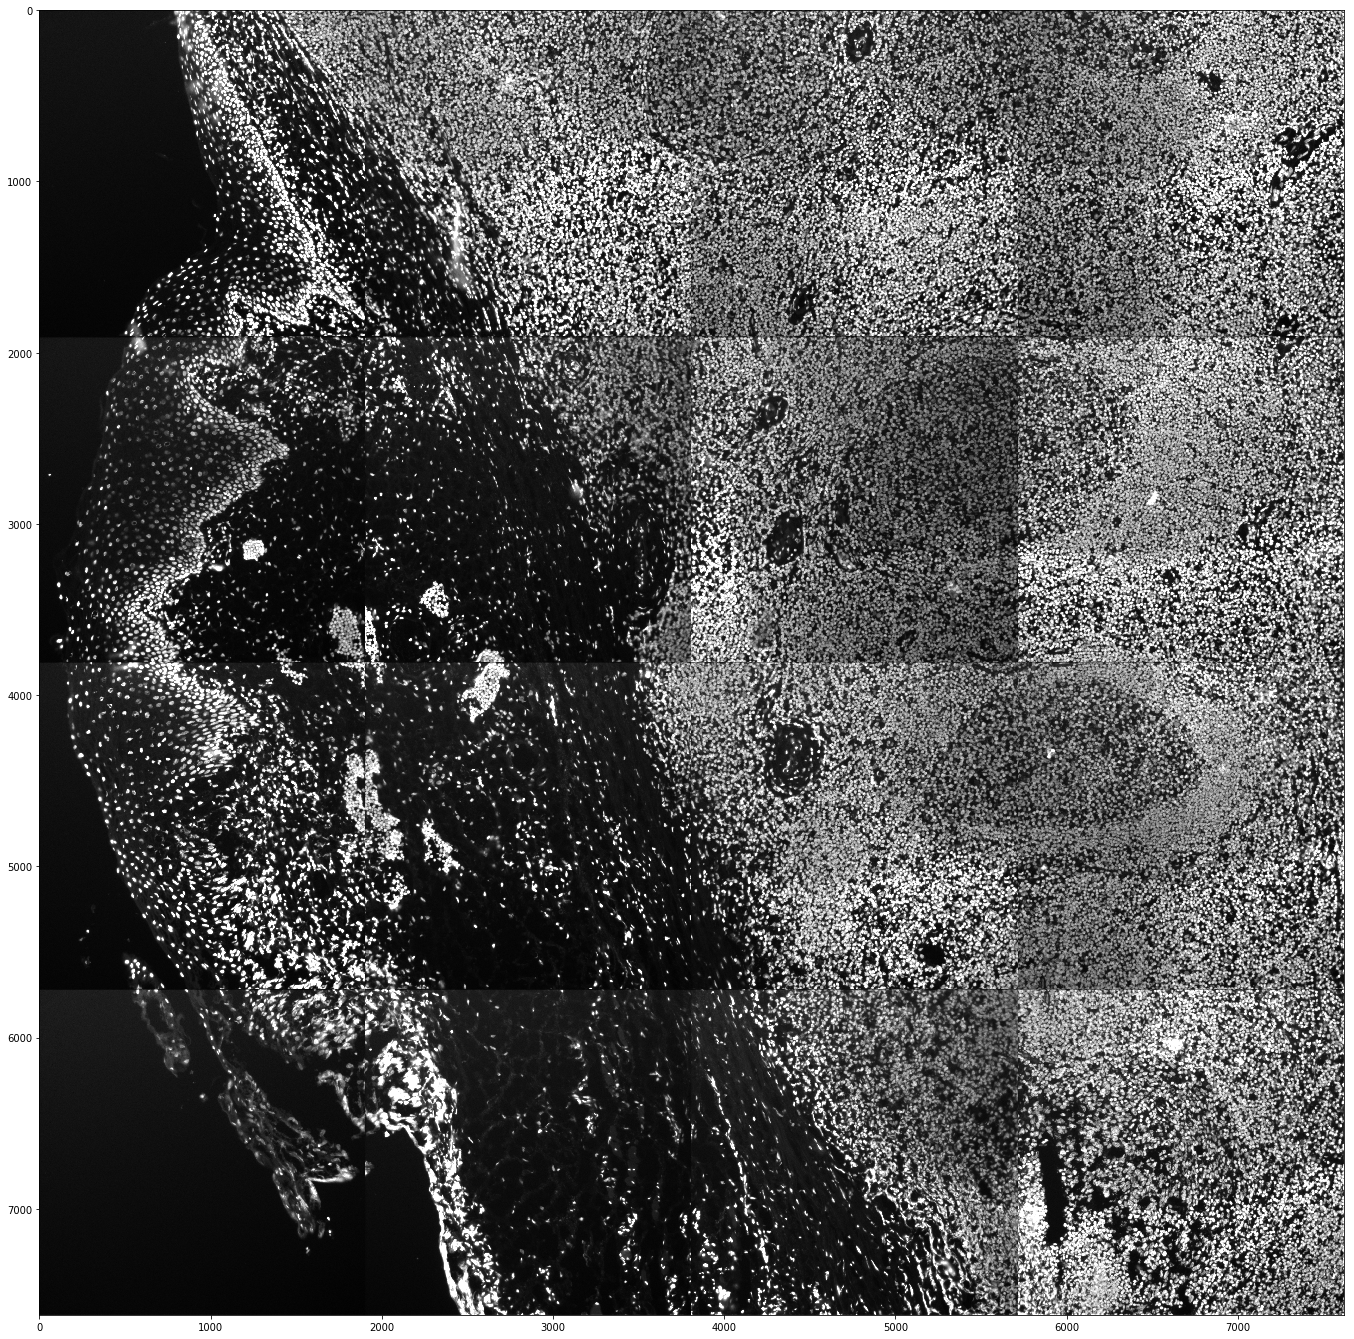

In [161]:
img_res = img[0, 0, ch_idx] / img_ic
#plt.imshow(img_res)
#plt.imshow(img_res.clip(0, 250))
plt.imshow(img_res.clip(0, 10000))
plt.gcf().set_size_inches(24, 24)

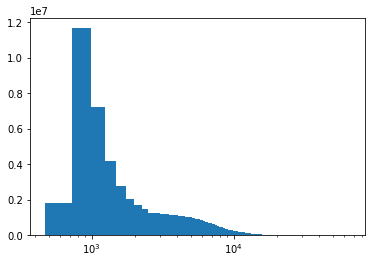

In [145]:
plt.hist(img_orig.ravel(), bins=256)
#plt.xscale('log')
plt.yscale('log')
None

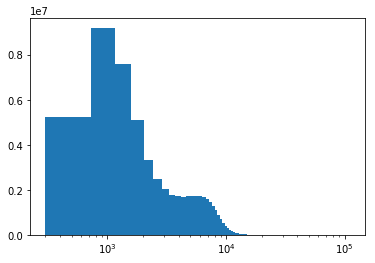

In [144]:
plt.hist(img_res.ravel(), bins=256)
plt.yscale('log')
# plt.xscale('log')
None